In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('House_Rent_Dataset.csv')
df=df1.copy()

In [ ]:
df.info()

In [ ]:
df.head(10)

In [ ]:
#installing necessary dependencies for pre-processing and visualisation
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df1 = pd.read_csv('House_Rent_Dataset.csv')
df = df1.copy()

# One-hot encode categorical columns
categorical_columns = ['Floor', 'Area Type', 'Furnishing Status',
                       'Tenant Preferred', 'Point of Contact']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Drop unnecessary columns
df.drop(columns=['Posted On', 'Area Locality', 'City'], inplace=True)

# Define features and target
X = df.drop(columns=['Rent'])
y = df['Rent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred_lr = linear_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Scatter plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='green', lw=2, label="Perfect Fit")
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'House_Rent_Dataset.csv'

In [ ]:
import pandas as pd

df1 = pd.read_csv('House_Rent_Dataset.csv')
df=df1.copy()

# One-hot encode categorical columns
categorical_columns = ['Floor', 'Area Type', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Drop unnecessary columns
df.drop(columns=['Posted On', 'Area Locality', 'City'], inplace=True)

# Define features and target
X = df.drop(columns=['Rent'])
y = df['Rent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#linear regression
linear_model =LinearRegression()
linear_model.fit(X_train,y_train)

FileNotFoundError: [Errno 2] No such file or directory: 'House_Rent_Dataset.csv'

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

#predictions and metrics
y_pred_lr = linear_model.predict(X_test)
print(f"Linear Regression R^2: {r2_score(y_test, y_pred_lr):.4f}")
print(f"Linear Regression RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")# Linear Regression


# Predictions and metrics

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:


# Scatter plot of actual vs predicted


# Set axis limits


In [ ]:
df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and metrics
y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest R^2: {r2_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")

Random Forest R^2: 0.9111
Random Forest RMSE: 26.59


In [ ]:
import xgboost as xgb

# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=310, learning_rate=0.16, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and metrics
y_pred_xgb = xgb_model.predict(X_test)
print(f"XGBoost R^2: {r2_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.2f}")

XGBoost R^2: 0.8707
XGBoost RMSE: 32.07


In [ ]:
# --- Predicting rent for a custom input with median/mode filling ---

# Compute median/mode for all training columns
fill_values = {}
for col in X_test.columns:
    if pd.api.types.is_numeric_dtype(X[col]):
        fill_values[col] = X[col].median()  # numeric → median
    else:
        fill_values[col] = X[col].mode()[0]  # categorical → mode

# Show columns for reference
print("Model expects these features:\n", list(X.columns))

# Example custom input (only use columns present in X.columns)
custom_input = {
    'BHK': [3],
    'Size': [1200],
    'Bathroom': [2],
}


# Convert to DataFrame and reindex to match X.columns
custom_df = pd.DataFrame(custom_input).reindex(columns=X.columns)

# Fill missing values with median/mode
custom_df = custom_df.fillna(fill_values)

# Predict
predicted_rent = linear_model.predict(custom_df)
print(f"Predicted Rent LR: {predicted_rent[0]:.2f}")

# Predict
predicted_rent1 = xgb_model.predict(custom_df)
print(f"Predicted Rent XG : {predicted_rent1[0]:.2f}")


# Predict
predicted_rent2 = rf_model.predict(custom_df)
print(f"Predicted Rent RF : {predicted_rent2[0]:.2f}")

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
plt.figure(figsize=(12,5))

# Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
# Set axis limits
plt.xlim(0, 250000)
plt.ylim(0, 250000)
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
# Set axis limits
plt.xlim(0, 250000)
plt.ylim(0, 250000)
plt.title("XGBoost: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()


In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df_class = pd.read_csv("House_Rent_Dataset.csv")

# Drop unnecessary columns
df_class = df_class.drop(columns=["Point of Contact", "Posted On"])

# Encode categorical variables
categorical_cols = df_class.select_dtypes(include="object").columns
le = LabelEncoder()
for col in categorical_cols:
    df_class[col] = le.fit_transform(df_class[col])

# Features and target
X = df_class.drop(columns=["BHK"])  # Features: everything except BHK
y = df_class["BHK"] - 1             # Target: BHK, shifted to start from 0

# Train-test split


# ---------------- Random Forest ----------------




# ---------------- XGBoost ----------------


In [ ]:
rf_importances = rf_clf.feature_importances_
sorted_idx = np.argsort(rf_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(rf_importances)), rf_importances[sorted_idx], align="center")
plt.yticks(range(len(rf_importances)), np.array(X.columns)[sorted_idx])
plt.title("Random Forest Feature Importance (Predicting BHK)")
plt.xlabel("Importance")
plt.show()

# =======================
# 6. Feature Importance (XGBoost)
# =======================
xgb_importances = xgb_clf.feature_importances_
sorted_idx = np.argsort(xgb_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(xgb_importances)), xgb_importances[sorted_idx], align="center", color='orange')
plt.yticks(range(len(xgb_importances)), np.array(X.columns)[sorted_idx])
plt.title("XGBoost Feature Importance (Predicting BHK)")
plt.xlabel("Importance")
plt.show()

In [ ]:

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#linear regression
linear_model =LinearRegression()
linear_model.fit(x_train,y_train)

#predictions and metrics
y_pred_lr = linear_model.predict(x_test)
print(f"Linear Regression R^2: {r2_score(y_test, y_pred_lr):.4f}")
print(f"Linear Regression RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")

NameError: name 'x_train' is not defined

In [ ]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'green', lw=2)

# Set axis limits
plt.xlim(0, 250000)
plt.ylim(0, 250000)

plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

NameError: name 'y_test' is not defined

<Figure size 800x600 with 0 Axes>

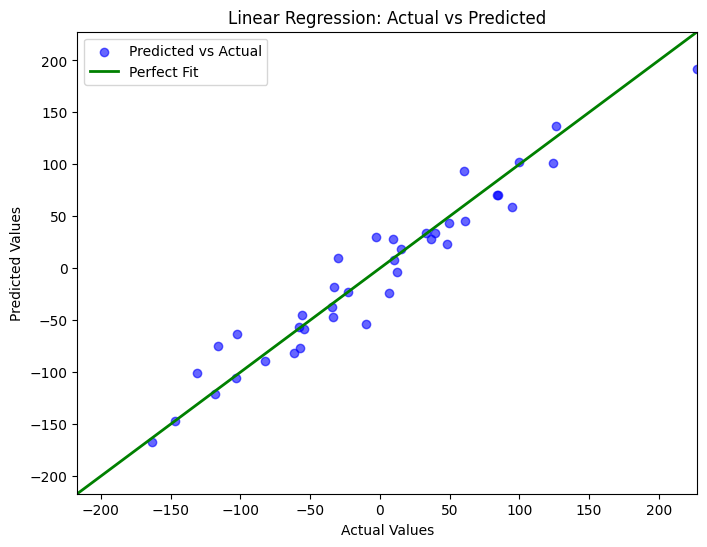

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# ---------------------------------------------
# Step 1: Create some sample regression data
# (replace this with your own dataset: X, y)
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict
y_pred_lr = model.predict(X_test)

# ---------------------------------------------
# Step 5: Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue', label="Predicted vs Actual")

# Reference line (perfect prediction)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='green', lw=2, label="Perfect Fit")

# Set axis limits
plt.xlim(min(y_test), max(y_test))
plt.ylim(min(y_test), max(y_test))

plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()
